<a href="https://colab.research.google.com/github/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/blob/main/PREPROCESSING_SENTIMEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm taudataNlpTm.py
!wget https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/taudataNlpTm.py
!rm taudata.py
!wget https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/taudata.py

!rm data/slangsoco.txt
!rm data/stopwords_en.txt
!rm data/stopwords_id.txt
!rm data/kata_dasar.txt
!rm data/corpus_sederhana.txt

!mkdir CSV
!wget -P CSV/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/CSV/AspekSentimenReview.csv

!mkdir data
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/kata_dasar.txt
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/wn-ind-def.tab
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/wn-msa-all.tab
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/all_indo_man_tag_corpus_model.crf.tagger
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/slangsoco.txt

!pip install Sastrawi
!pip install unidecode
!pip install python-crfsuite
!pip install sklearn-pycrfsuite

rm: cannot remove 'taudataNlpTm.py': No such file or directory
--2021-08-13 19:06:11--  https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16713 (16K) [text/plain]
Saving to: ‘taudataNlpTm.py’

taudataNlpTm.py     100%[===================>]  16.32K  --.-KB/s    in 0.001s  

2021-08-13 19:06:11 (12.6 MB/s) - ‘taudataNlpTm.py’ saved [16713/16713]

rm: cannot remove 'taudata.py': No such file or directory
--2021-08-13 19:06:11--  https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/taudata.py
Resolving raw

In [2]:
import taudata as tau
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import nltk
from tqdm import tqdm_notebook as tqdm
from collections import Counter
from google.colab import files
from IPython import display
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [3]:
df = pd.read_csv('CSV/AspekSentimenReview.csv')
df.head()

,At,Sentimen,Review,Bintang,Aspek
0,2020-10-18 19:32:19,1,gud,5,Lainnya
1,2020-10-17 20:18:47,1,"Seneng belanja disini karna dah pastinya ori, ...",5,Layanan
2,2020-10-17 07:44:22,-1,"Pertamakali order langsung kecewa, di cancel k...",1,Layanan
3,2020-10-17 05:29:05,-1,Sociolla parah. Proses refund gak tau harus nu...,1,Layanan
4,2020-10-17 00:12:18,-1,Sy order 4 product di tanggal 11 september dan...,1,Layanan


In [4]:
sw=open('data/slangsoco.txt',"r",encoding="utf-8", errors='replace')
slangS = sw.readlines(); sw.close()

slangS = [df.strip('\n').strip() for df in slangS]
slangS = [s_.split(' : ') for s_ in slangS]
slang_ = {}
for s_ in slangS:
    try:
        slang_[s_[0].strip()] = s_[1].strip()
    except:
        print(s_)
slangS = slang_.copy()

['udah sudah']


In [5]:
b = []
for h in df['Review']:
    T = TextBlob(h.lower()).words
    for i,t in enumerate(T):
        if str(t) in slangS.keys():
            T[i] = slangS[str(t)]
    b.append(' '.join(T))

b[:5]

['good',
 'senang belanja disini karena deh pastinya original pengiriman langsung jalan satu hari setelah bayar banyak diskon admin responsif juga metode pembayaran juga banyak dan reachable suka sekali tetapi terkadang ada suka error tidak jelas begitu selain itu sudah bagus sekali sih menurut saya recommended',
 'pertama kali order langsung kecewa di cancel karena barang nya ada satu yang kosong proses pengembalian uang sulit check out tanggal 13 oktober konfirmasi tanggal 15 uang akan di kembalikan dalam 7-10 hari kerja maks tanggal 2 november kelamaan woi karena banyak antrian refund katanya tidak ingin sedang order lewat sini',
 'sociola parah proses refund tidak tahu harus menunggu berapa lama padahal ini sudah masuk 3 hari kerja uang saya 775.439 belum dikembalikan padahal sociola sendiri yang cancel order saya karena ada stock barang yang kosong email juga udah 2 hari tidak direspon',
 'saya order 4 product di tanggal 11 september dan yang datang hanya 2 ini udah 16 oktober art

In [6]:
_ , lemmaId = tau.LoadStopWords(lang='id')

In [7]:
data = []
for i, d in tqdm(enumerate(b)):
    doc = tau.cleanText(d, lemma=lemmaId, stops = {}, symbols_remove = True, min_charLen = 2, fixTag= True, fixMix=True)
    data.append(doc)

print(data[:3])

0it [00:00, ?it/s]

['good', 'senang belanja sini karena deh pasti original kirim langsung jalan satu hari telah bayar banyak diskon admin responsif juga metode bayar juga banyak dan reachable suka sekali tetapi terkadang ada suka error tidak jelas begitu selain itu sudah bagus sekali sih turut saya recommended', 'pertama kali order langsung kecewa di cancel karena barang nya ada satu yang kosong proses kembali uang sulit check out tanggal  13  oktober konfirmasi tanggal  15  uang akan di kembali dalam  7 - 10  hari kerja maks tanggal november lama woi karena banyak antri refund kata tidak ingin sedang order lewat sini']


In [8]:
df['data_cleaned'] = data
df.to_csv('PREPROSS_SENTIMEN.csv')
df.head()

,At,Sentimen,Review,Bintang,Aspek,data_cleaned
0,2020-10-18 19:32:19,1,gud,5,Lainnya,good
1,2020-10-17 20:18:47,1,"Seneng belanja disini karna dah pastinya ori, ...",5,Layanan,senang belanja sini karena deh pasti original ...
2,2020-10-17 07:44:22,-1,"Pertamakali order langsung kecewa, di cancel k...",1,Layanan,pertama kali order langsung kecewa di cancel k...
3,2020-10-17 05:29:05,-1,Sociolla parah. Proses refund gak tau harus nu...,1,Layanan,sociola parah proses refund tidak tahu harus t...
4,2020-10-17 00:12:18,-1,Sy order 4 product di tanggal 11 september dan...,1,Layanan,saya order product di tanggal 11 september d...


In [9]:
df_pos = df[df['Sentimen']==1]['data_cleaned']
df_pos.to_csv('sentimen_positif.csv', encoding='utf8', index = False)
df_neg = df[df['Sentimen']==-1]['data_cleaned']
df_neg.to_csv('sentimen_negatif.csv', encoding='utf8', index = False)
df_net = df[df['Sentimen']==0]['data_cleaned']
df_net.to_csv('sentimen_netral.csv', encoding='utf8', index = False)

#Aspek Layanan
df_laypos = df[(df['Aspek']=="Layanan") & (df['Sentimen']==1)]['data_cleaned']
df_laypos.to_csv('aspek_layanan_positif.csv', encoding='utf8', index = False)
df_layneg = df[(df['Aspek']=="Layanan") & (df['Sentimen']==-1)]['data_cleaned']
df_layneg.to_csv('aspek_layanan_negatif.csv', encoding='utf8', index = False)
df_laynet = df[(df['Aspek']=="Layanan") & (df['Sentimen']==0)]['data_cleaned']
df_laynet.to_csv('aspek_layanan_netral.csv', encoding='utf8', index = False)

#Aspek Tampilan
df_tampos = df[(df['Aspek']=="Tampilan") & (df['Sentimen']==1)]['data_cleaned']
df_tampos.to_csv('aspek_tampilan_positif.csv', encoding='utf8', index = False)
df_tamneg = df[(df['Aspek']=="Tampilan") & (df['Sentimen']==-1) ]['data_cleaned']
df_tamneg.to_csv('aspek_tampilan_negatif.csv', encoding='utf8', index = False)
df_tamnet = df[(df['Aspek']=="Tampilan") & (df['Sentimen']==0)]['data_cleaned']
df_tamnet.to_csv('aspek_tampilan_netral.csv', encoding='utf8', index = False)

#Aspek Produk
df_propos = df[(df['Aspek']=="Produk") & (df['Sentimen']==1)]['data_cleaned']
df_propos.to_csv('aspek_produk_positif.csv', encoding='utf8', index = False)
df_proneg = df[(df['Aspek']=="Produk") & (df['Sentimen']==-1) ]['data_cleaned']
df_proneg.to_csv('aspek_produk_negatif.csv', encoding='utf8', index = False)
df_pronet = df[(df['Aspek']=="Produk") & (df['Sentimen']==0)]['data_cleaned']
df_pronet.to_csv('aspek_produk_netral.csv', encoding='utf8', index = False)

#Aspek Lainnya
df_lapos = df[(df['Aspek']=="Lainnya") & (df['Sentimen']==1)]['data_cleaned']
df_lapos.to_csv('aspek_lainnya_positif.csv', encoding='utf8', index = False)
df_laneg = df[(df['Aspek']=="Lainnya") & (df['Sentimen']==-1) ]['data_cleaned']
df_laneg.to_csv('aspek_lainnya_negatif.csv', encoding='utf8', index = False)
df_lanet = df[(df['Aspek']=="Lainnya") & (df['Sentimen']==0)]['data_cleaned']
df_lanet.to_csv('aspek_lainnya_netral.csv', encoding='utf8', index = False)

## **PROPORSI TEXT ANALITICS DATA SENTIMEN**

Proporsi Sentimen


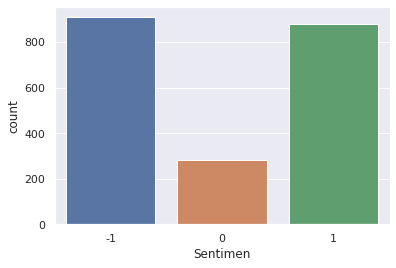

In [10]:
print("Proporsi Sentimen")
ax = sns.countplot(df['Sentimen'])

In [11]:
df['Sentimen'].value_counts()

-1    909
 1    880
 0    284
Name: Sentimen, dtype: int64

Proporsi Aspek


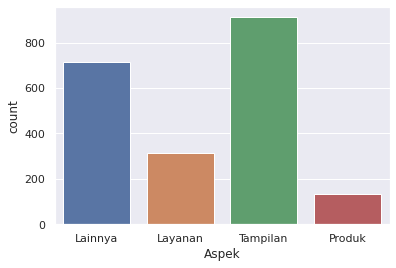

In [16]:
print("Proporsi Aspek")
ax = sns.countplot(df['Aspek'])

In [17]:
df['Aspek'].value_counts()

Tampilan    912
Lainnya     715
Layanan     312
Produk      134
Name: Aspek, dtype: int64

In [12]:
df['At'] = pd.to_datetime(df['At'])

datesen_counts = (df.groupby(df['At'].dt.year)['Sentimen']
                .value_counts()
                .rename('Data')
                .reset_index()
                .sort_values('At'))
print(datesen_counts)

     At  Sentimen  Data
0  2019        -1   628
1  2019         1   614
2  2019         0   206
3  2020        -1   281
4  2020         1   266
5  2020         0    78


Proporsi Sentimen Tahun


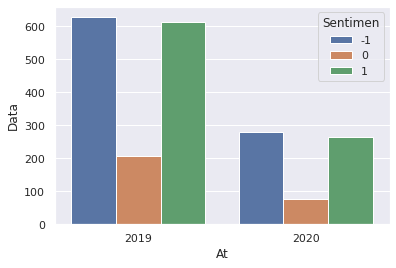

In [13]:
print("Proporsi Sentimen Tahun")
p = sns.barplot(x="At", y="Data", hue="Sentimen", data=datesen_counts)

In [14]:
aspek_counts = (df.groupby(['Aspek'])['Sentimen']
                .value_counts() 
                     .rename('Data')
                     .reset_index()
                     .sort_values('Sentimen'))
print(aspek_counts)

       Aspek  Sentimen  Data
1    Lainnya        -1   160
3    Layanan        -1   142
7     Produk        -1    12
9   Tampilan        -1   595
2    Lainnya         0    45
5    Layanan         0    31
8     Produk         0     3
10  Tampilan         0   205
0    Lainnya         1   510
4    Layanan         1   139
6     Produk         1   119
11  Tampilan         1   112


Proporsi Aspek


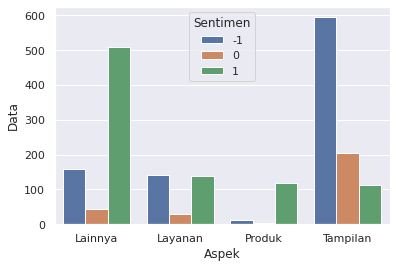

In [15]:
print("Proporsi Aspek")
p = sns.barplot(x="Aspek", y="Data", hue="Sentimen", data=aspek_counts)